# Natural Language Processing Using Tensorflow



# Dataset: Reuters newswire dataset (Keras built-in datasets).

The Reuters Newswire Dataset comprises 11,228 news articles sourced from Reuters, each categorized into one of 46 topics. Each news article is represented as a text sequence, encoded as a list of word indexes. In this representation, individual words are tokenized and represented as integers 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print("TensorFlow version:{}".format(tf.__version__))
print("Keras version:{}".format(keras.__version__))

TensorFlow version:2.9.2
Keras version:2.9.0


# Load the `word_index` for the Reuters dataset, which is a dictionary consisting of words as keys and the corresponding integer indices as values. There are 30,979 words in the vocabulary for this dataset. 

In [ ]:
word_index = keras.datasets.reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [ ]:
len(word_index)

30979

In [ ]:
list(word_index.items())[:10]

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796),
 ('localized', 20672),
 ('sation', 20673),
 ('chanthaburi', 20675),
 ('refunding', 10997),
 ('hermann', 8804)]

Let's load the dataset by using the first 30,000 words.

In [ ]:
max_features = 30000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=max_features, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
# Your Code Here
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

8982
8982
2246
2246


In [ ]:
print(train_data[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
print(train_data[1])

[1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


Based on the word_index, we can find the sentences that correspond to each sequence of integers.

In [ ]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

print([reverse_word_index.get(i-3) for i in train_data[0]])

[None, 'mcgrath', 'rentcorp', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']


The labels are the categories of the newswires with all 46 categories.

```
Reuters dataset labels:
{'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 
'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 
'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20,
 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38,
  'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4,
   'pet-chem': 39, 'grain': 1, 'retail': 29}
```

In [ ]:
train_labels[0]

3

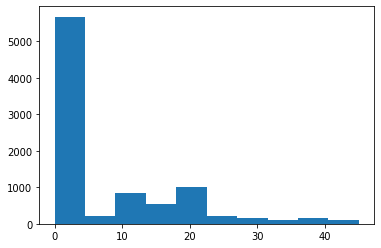

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_labels)
plt.show()


## Lets Pad the Sequences

In [ ]:
len_sequences = np.array([], dtype = np.int64)

for x in train_data:
  len_sequences = np.append(len_sequences,len(x))

print(np.mean(len_sequences))
print(np.max(len_sequences))
print(np.min(len_sequences))


145.5398574927633
2376
13


In [ ]:
pad_length = 300
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_data, maxlen=pad_length)
test_data = pad_sequences(test_data, maxlen=pad_length)

Show the first 2 padded sequences in the train dataset. 

In [ ]:
print(train_data[0])
print(train_data[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

## Create and Train a Model with Dense Layers

In [ ]:
embedding_dim = 64
model_1 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           1920000   
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 1024)              19661824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 46)                47150     
                                                                 
Total params: 21,628,974
Trainable params: 21,628,974
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2)

evals_test = model_1.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])



Epoch 1/5
71/71 [==============================] - 64s 885ms/step - loss: 2.0802 - accuracy: 0.4715 - val_loss: 1.6423 - val_accuracy: 0.5899
Epoch 2/5
71/71 [==============================] - 62s 881ms/step - loss: 1.2039 - accuracy: 0.7121 - val_loss: 1.3315 - val_accuracy: 0.6848
Epoch 3/5
71/71 [==============================] - 69s 967ms/step - loss: 0.6276 - accuracy: 0.8579 - val_loss: 1.2929 - val_accuracy: 0.7066
Epoch 4/5
71/71 [==============================] - 62s 869ms/step - loss: 0.3283 - accuracy: 0.9329 - val_loss: 1.3062 - val_accuracy: 0.7057
Epoch 5/5
71/71 [==============================] - 5s 66ms/step - loss: 1.2943 - accuracy: 0.7168
Classification Accuracy:  0.7168298959732056


Epoch 1/5
71/71 [==============================] - 52s 727ms/step - loss: 2.0326 - accuracy: 0.4899 - val_loss: 1.5970 - val_accuracy: 0.6175
Epoch 2/5
71/71 [==============================] - 49s 689ms/step - loss: 1.1213 - accuracy: 0.7398 - val_loss: 1.3089 - val_accuracy: 0.6999
Epoch 3/5
71/71 [==============================] - 49s 691ms/step - loss: 0.5463 - accuracy: 0.8808 - val_loss: 1.2512 - val_accuracy: 0.7057
Epoch 4/5
71/71 [==============================] - 51s 714ms/step - loss: 0.2829 - accuracy: 0.9415 - val_loss: 1.2998 - val_accuracy: 0.7066
Epoch 5/5
71/71 [==============================] - 49s 687ms/step - loss: 0.2058 - accuracy: 0.9542 - val_loss: 1.2993 - val_accuracy: 0.7119


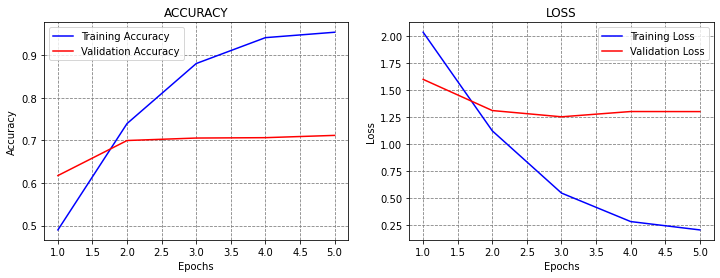

71/71 [==============================] - 3s 46ms/step - loss: 1.2993 - accuracy: 0.7119
Classification Accuracy:  0.7119323015213013


In [ ]:
def plot_accuracy_loss():
    # plot the accuracy and loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy']

    epochsn = np.arange(1, len(train_loss)+1,1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1,2,1)
    plt.plot(epochsn, acc, 'b', label='Training Accuracy')
    plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
    plt.grid(color='gray', linestyle='--')
    plt.legend()            
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(epochsn,train_loss, 'b', label='Training Loss')
    plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
    plt.grid(color='gray', linestyle='--')
    plt.legend()
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show() 

    
embedding_dim = 64

model_2 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

history = model_2.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])

plot_accuracy_loss()

evals_test = model_2.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


### Global Average Pooling Layer

Epoch 1/5
71/71 [==============================] - 5s 63ms/step - loss: 2.7382 - accuracy: 0.3486 - val_loss: 2.2943 - val_accuracy: 0.3620
Epoch 2/5
71/71 [==============================] - 5s 73ms/step - loss: 2.2234 - accuracy: 0.3559 - val_loss: 2.1267 - val_accuracy: 0.3740
Epoch 3/5
71/71 [==============================] - 4s 61ms/step - loss: 1.9855 - accuracy: 0.4135 - val_loss: 1.8576 - val_accuracy: 0.4826
Epoch 4/5
71/71 [==============================] - 4s 61ms/step - loss: 1.7474 - accuracy: 0.5394 - val_loss: 1.6950 - val_accuracy: 0.5695
Epoch 5/5
71/71 [==============================] - 4s 63ms/step - loss: 1.5719 - accuracy: 0.6029 - val_loss: 1.5881 - val_accuracy: 0.6033


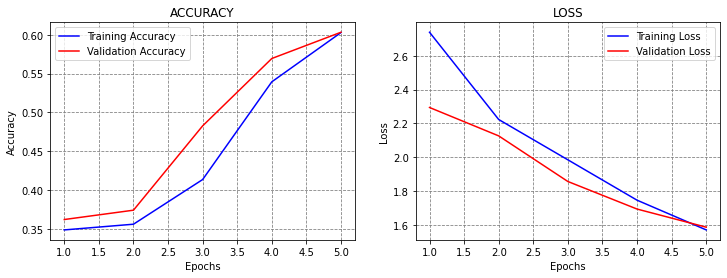

71/71 [==============================] - 0s 5ms/step - loss: 1.5881 - accuracy: 0.6033
Classification Accuracy:  0.6032947301864624


In [ ]:
# Your Code Here
embedding_dim = 64

# Create a model
model_3 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2)

plot_accuracy_loss()

evals_test = model_3.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


### Apply Different Learning Rates

In [ ]:
model_4 = model_3
model_5 = model_3
model_6 = model_3

from tensorflow.keras.optimizers import Adam

model_4.compile(optimizer= Adam(learning_rate=.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_4.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2)


evals_test = model_4.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


model_5.compile(optimizer= Adam(learning_rate=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2)

evals_test = model_5.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


model_6.compile(optimizer= Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_6.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2)


evals_test = model_6.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


Epoch 1/5
71/71 [==============================] - 6s 73ms/step - loss: 1.3543 - accuracy: 0.6662 - val_loss: 1.2483 - val_accuracy: 0.6897
Epoch 2/5
71/71 [==============================] - 4s 58ms/step - loss: 0.8500 - accuracy: 0.7921 - val_loss: 1.2118 - val_accuracy: 0.7324
Epoch 3/5
71/71 [==============================] - 4s 59ms/step - loss: 0.5664 - accuracy: 0.8568 - val_loss: 1.1533 - val_accuracy: 0.7547
Epoch 4/5
71/71 [==============================] - 4s 59ms/step - loss: 0.4082 - accuracy: 0.8927 - val_loss: 1.2635 - val_accuracy: 0.7453
Epoch 5/5
71/71 [==============================] - 0s 4ms/step - loss: 1.2028 - accuracy: 0.7760
Classification Accuracy:  0.7760462760925293
Epoch 1/5
71/71 [==============================] - 5s 68ms/step - loss: 0.1821 - accuracy: 0.9477 - val_loss: 1.2520 - val_accuracy: 0.7827
Epoch 2/5
71/71 [==============================] - 4s 52ms/step - loss: 0.1579 - accuracy: 0.9521 - val_loss: 1.3078 - val_accuracy: 0.7850
Epoch 3/5
71/71 [=

### Reduce Learning Rate on Plateau

In [ ]:
# Your Code Here
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
embedding_dim = 64

# Create a model
model_7 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(.5),
       tf.keras.layers.Dense(46, activation='softmax')
])


model_7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

history = model_7.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)])


evals_test = model_7.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])
#Performance on accuracy is not improved as we see.


Epoch 1/5
71/71 [==============================] - 48s 648ms/step - loss: 2.0521 - accuracy: 0.4837 - val_loss: 1.6317 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 2/5
71/71 [==============================] - 45s 632ms/step - loss: 1.1793 - accuracy: 0.7188 - val_loss: 1.3448 - val_accuracy: 0.6848 - lr: 0.0010
Epoch 3/5
71/71 [==============================] - 46s 654ms/step - loss: 0.5834 - accuracy: 0.8703 - val_loss: 1.3049 - val_accuracy: 0.6995 - lr: 0.0010
Epoch 4/5
71/71 [==============================] - 46s 642ms/step - loss: 0.3027 - accuracy: 0.9415 - val_loss: 1.3086 - val_accuracy: 0.7026 - lr: 0.0010
Epoch 5/5
71/71 [==============================] - 3s 40ms/step - loss: 1.3261 - accuracy: 0.7021
Classification Accuracy:  0.7021371126174927


### Apply Learning Rate Scheduler

In [ ]:
import math

INITIAL_LEARNING_RATE = 1e-4
EPOCHS_NUM = 5

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 5
    return INITIAL_LEARNING_RATE * math.pow(drop_rate, math.floor(epoch/epochs_drop))


embedding_dim = 64

# Create a model
model_8 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(.5),
       tf.keras.layers.Dense(46, activation='softmax')
])


model_8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model_8.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2, callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)])

evals_test = model_8.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


Epoch 1/5
71/71 [==============================] - 48s 671ms/step - loss: 2.5423 - accuracy: 0.3601 - val_loss: 2.3178 - val_accuracy: 0.4337 - lr: 1.0000e-04
Epoch 2/5
71/71 [==============================] - 45s 634ms/step - loss: 2.1959 - accuracy: 0.4547 - val_loss: 2.0871 - val_accuracy: 0.4898 - lr: 1.0000e-04
Epoch 3/5
71/71 [==============================] - 46s 641ms/step - loss: 1.9218 - accuracy: 0.5108 - val_loss: 1.9153 - val_accuracy: 0.5236 - lr: 1.0000e-04
Epoch 4/5
71/71 [==============================] - 46s 652ms/step - loss: 1.7069 - accuracy: 0.5779 - val_loss: 1.7899 - val_accuracy: 0.5476 - lr: 1.0000e-04
Epoch 5/5
71/71 [==============================] - 3s 38ms/step - loss: 1.6712 - accuracy: 0.5962
Classification Accuracy:  0.596170961856842


## Create and Train a Model with Recurrent Layers

In [ ]:
embedding_dim = 64

model_9 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dense(46, activation='softmax')
])

model_9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_9.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2)

evals_test = model_9.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

Epoch 1/5
71/71 [==============================] - 77s 1s/step - loss: 2.3959 - accuracy: 0.3835 - val_loss: 1.8349 - val_accuracy: 0.5027
Epoch 2/5
71/71 [==============================] - 71s 1s/step - loss: 1.6930 - accuracy: 0.5574 - val_loss: 1.6886 - val_accuracy: 0.5882
Epoch 3/5
71/71 [==============================] - 74s 1s/step - loss: 1.5936 - accuracy: 0.5549 - val_loss: 1.6615 - val_accuracy: 0.5739
Epoch 4/5
71/71 [==============================] - 72s 1s/step - loss: 1.3555 - accuracy: 0.6349 - val_loss: 1.5996 - val_accuracy: 0.5939
Epoch 5/5
71/71 [==============================] - 5s 72ms/step - loss: 1.6564 - accuracy: 0.5904
Classification Accuracy:  0.5903828740119934


### Improved Model

In [ ]:
embedding_dim = 64
model_9_improved = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=pad_length),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dense(46, activation='softmax')
])


model_9_improved.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_9_improved.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 128, epochs=5, validation_split=0.2, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)])

evals_test = model_9_improved.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

Epoch 1/5
71/71 [==============================] - 78s 1s/step - loss: 2.4967 - accuracy: 0.3703 - val_loss: 2.0338 - val_accuracy: 0.4207 - lr: 0.0010
Epoch 2/5
71/71 [==============================] - 72s 1s/step - loss: 1.8106 - accuracy: 0.5119 - val_loss: 1.7533 - val_accuracy: 0.5401 - lr: 0.0010
Epoch 3/5
71/71 [==============================] - 72s 1s/step - loss: 1.5248 - accuracy: 0.6050 - val_loss: 1.6649 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 4/5
71/71 [==============================] - 72s 1s/step - loss: 1.3317 - accuracy: 0.6532 - val_loss: 1.5531 - val_accuracy: 0.6015 - lr: 0.0010
Epoch 5/5
71/71 [==============================] - 5s 71ms/step - loss: 1.6026 - accuracy: 0.6015
Classification Accuracy:  0.6015138030052185


## Create and Train a Transformer Model

In [ ]:
# Your Code Here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_embeddings = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.positional_embeddings = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.positional_embeddings(positions)
        input_embeddings = self.token_embeddings(inputs)
        return input_embeddings + position_embeddings

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.multi_head_attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.feed_forward_net = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layer_normalization1 = layers.LayerNormalization(epsilon=1e-6)
        self.layer_normalization2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        multi_head_att_output = self.multi_head_attention(inputs, inputs)
        multi_head_att_dropout = self.dropout1(multi_head_att_output, training=training)
        add_norm_output_1 = self.layer_normalization1(inputs + multi_head_att_dropout)
        feed_forward_output = self.feed_forward_net(add_norm_output_1)
        feed_forward_dropout = self.dropout2(feed_forward_output, training=training)
        add_norm_output_2 = self.layer_normalization2(add_norm_output_1 + feed_forward_dropout)
        return add_norm_output_2


maxlen = 300  # Maximum length of input sequences is 300 words
embed_dim = 64  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 46  # Dense layer size in the feed forward network inside transformer
vocab_size = 30979  # The size of the vocabulary is 20k words

# encoder
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer)

# classifier
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(46, activation="sigmoid")(x)

model_10 = keras.Model(inputs=inputs, outputs=outputs)

model_10.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_10.fit(train_data, train_labels, batch_size=32, epochs=2, validation_data=(test_data, test_labels))

evals_test = model_10.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

Epoch 1/2
281/281 [==============================] - 108s 377ms/step - loss: 1.9972 - accuracy: 0.5126 - val_loss: 1.3969 - val_accuracy: 0.6679
Epoch 2/2
71/71 [==============================] - 9s 125ms/step - loss: 1.0867 - accuracy: 0.7418
Classification Accuracy:  0.7417631149291992
